# Basic MLP Pima Indian Dataset

##### As always, start by importing modules
##### Now we are bringing in the Tensorflow procedures that are used to build a neural network

##### Sequential is the basic model type that runs layers one after another (sequentially)
##### Dense is the simplest neuron layer where all outputs from the previous layer are connected to each input of this layer

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import os

##### Next cell has all the data hard coded in it, it's hidden but can still be executed

In [2]:
pima_data=np.array([
[6,148,72,35,0,33.6,0.627,50,1],
[1,85,66,29,0,26.6,0.351,31,0],
[8,183,64,0,0,23.3,0.672,32,1],
[1,89,66,23,94,28.1,0.167,21,0],
[0,137,40,35,168,43.1,2.288,33,1],
[5,116,74,0,0,25.6,0.201,30,0],
[3,78,50,32,88,31.0,0.248,26,1],
[10,115,0,0,0,35.3,0.134,29,0],
[2,197,70,45,543,30.5,0.158,53,1],
[8,125,96,0,0,0.0,0.232,54,1],
[4,110,92,0,0,37.6,0.191,30,0],
[10,168,74,0,0,38.0,0.537,34,1],
[10,139,80,0,0,27.1,1.441,57,0],
[1,189,60,23,846,30.1,0.398,59,1],
[5,166,72,19,175,25.8,0.587,51,1],
[7,100,0,0,0,30.0,0.484,32,1],
[0,118,84,47,230,45.8,0.551,31,1],
[7,107,74,0,0,29.6,0.254,31,1],
[1,103,30,38,83,43.3,0.183,33,0],
[1,115,70,30,96,34.6,0.529,32,1],
[3,126,88,41,235,39.3,0.704,27,0],
[8,99,84,0,0,35.4,0.388,50,0],
[7,196,90,0,0,39.8,0.451,41,1],
[9,119,80,35,0,29.0,0.263,29,1],
[11,143,94,33,146,36.6,0.254,51,1],
[10,125,70,26,115,31.1,0.205,41,1],
[7,147,76,0,0,39.4,0.257,43,1],
[1,97,66,15,140,23.2,0.487,22,0],
[13,145,82,19,110,22.2,0.245,57,0],
[5,117,92,0,0,34.1,0.337,38,0],
[5,109,75,26,0,36.0,0.546,60,0],
[3,158,76,36,245,31.6,0.851,28,1],
[3,88,58,11,54,24.8,0.267,22,0],
[6,92,92,0,0,19.9,0.188,28,0],
[10,122,78,31,0,27.6,0.512,45,0],
[4,103,60,33,192,24.0,0.966,33,0],
[11,138,76,0,0,33.2,0.420,35,0],
[9,102,76,37,0,32.9,0.665,46,1],
[2,90,68,42,0,38.2,0.503,27,1],
[4,111,72,47,207,37.1,1.390,56,1],
[3,180,64,25,70,34.0,0.271,26,0],
[7,133,84,0,0,40.2,0.696,37,0],
[7,106,92,18,0,22.7,0.235,48,0],
[9,171,110,24,240,45.4,0.721,54,1],
[7,159,64,0,0,27.4,0.294,40,0],
[0,180,66,39,0,42.0,1.893,25,1],
[1,146,56,0,0,29.7,0.564,29,0],
[2,71,70,27,0,28.0,0.586,22,0],
[7,103,66,32,0,39.1,0.344,31,1],
[7,105,0,0,0,0.0,0.305,24,0],
[1,103,80,11,82,19.4,0.491,22,0],
[1,101,50,15,36,24.2,0.526,26,0],
[5,88,66,21,23,24.4,0.342,30,0],
[8,176,90,34,300,33.7,0.467,58,1],
[7,150,66,42,342,34.7,0.718,42,0],
[1,73,50,10,0,23.0,0.248,21,0],
[7,187,68,39,304,37.7,0.254,41,1],
[0,100,88,60,110,46.8,0.962,31,0],
[0,146,82,0,0,40.5,1.781,44,0],
[0,105,64,41,142,41.5,0.173,22,0],
[2,84,0,0,0,0.0,0.304,21,0],
[8,133,72,0,0,32.9,0.270,39,1],
[5,44,62,0,0,25.0,0.587,36,0],
[2,141,58,34,128,25.4,0.699,24,0],
[7,114,66,0,0,32.8,0.258,42,1],
[5,99,74,27,0,29.0,0.203,32,0],
[0,109,88,30,0,32.5,0.855,38,1],
[2,109,92,0,0,42.7,0.845,54,0],
[1,95,66,13,38,19.6,0.334,25,0],
[4,146,85,27,100,28.9,0.189,27,0],
[2,100,66,20,90,32.9,0.867,28,1],
[5,139,64,35,140,28.6,0.411,26,0],
[13,126,90,0,0,43.4,0.583,42,1],
[4,129,86,20,270,35.1,0.231,23,0],
[1,79,75,30,0,32.0,0.396,22,0],
[1,0,48,20,0,24.7,0.140,22,0],
[7,62,78,0,0,32.6,0.391,41,0],
[5,95,72,33,0,37.7,0.370,27,0],
[0,131,0,0,0,43.2,0.270,26,1],
[2,112,66,22,0,25.0,0.307,24,0],
[3,113,44,13,0,22.4,0.140,22,0],
[2,74,0,0,0,0.0,0.102,22,0],
[7,83,78,26,71,29.3,0.767,36,0],
[0,101,65,28,0,24.6,0.237,22,0],
[5,137,108,0,0,48.8,0.227,37,1],
[2,110,74,29,125,32.4,0.698,27,0],
[13,106,72,54,0,36.6,0.178,45,0],
[2,100,68,25,71,38.5,0.324,26,0],
[15,136,70,32,110,37.1,0.153,43,1],
[1,107,68,19,0,26.5,0.165,24,0],
[1,80,55,0,0,19.1,0.258,21,0],
[4,123,80,15,176,32.0,0.443,34,0],
[7,81,78,40,48,46.7,0.261,42,0],
[4,134,72,0,0,23.8,0.277,60,1],
[2,142,82,18,64,24.7,0.761,21,0],
[6,144,72,27,228,33.9,0.255,40,0],
[2,92,62,28,0,31.6,0.130,24,0],
[1,71,48,18,76,20.4,0.323,22,0],
[6,93,50,30,64,28.7,0.356,23,0],
[1,122,90,51,220,49.7,0.325,31,1],
[1,163,72,0,0,39.0,1.222,33,1],
[1,151,60,0,0,26.1,0.179,22,0],
[0,125,96,0,0,22.5,0.262,21,0],
[1,81,72,18,40,26.6,0.283,24,0],
[2,85,65,0,0,39.6,0.930,27,0],
[1,126,56,29,152,28.7,0.801,21,0],
[1,96,122,0,0,22.4,0.207,27,0],
[4,144,58,28,140,29.5,0.287,37,0],
[3,83,58,31,18,34.3,0.336,25,0],
[0,95,85,25,36,37.4,0.247,24,1],
[3,171,72,33,135,33.3,0.199,24,1],
[8,155,62,26,495,34.0,0.543,46,1],
[1,89,76,34,37,31.2,0.192,23,0],
[4,76,62,0,0,34.0,0.391,25,0],
[7,160,54,32,175,30.5,0.588,39,1],
[4,146,92,0,0,31.2,0.539,61,1],
[5,124,74,0,0,34.0,0.220,38,1],
[5,78,48,0,0,33.7,0.654,25,0],
[4,97,60,23,0,28.2,0.443,22,0],
[4,99,76,15,51,23.2,0.223,21,0],
[0,162,76,56,100,53.2,0.759,25,1],
[6,111,64,39,0,34.2,0.260,24,0],
[2,107,74,30,100,33.6,0.404,23,0],
[5,132,80,0,0,26.8,0.186,69,0],
[0,113,76,0,0,33.3,0.278,23,1],
[1,88,30,42,99,55.0,0.496,26,1],
[3,120,70,30,135,42.9,0.452,30,0],
[1,118,58,36,94,33.3,0.261,23,0],
[1,117,88,24,145,34.5,0.403,40,1],
[0,105,84,0,0,27.9,0.741,62,1],
[4,173,70,14,168,29.7,0.361,33,1],
[9,122,56,0,0,33.3,1.114,33,1],
[3,170,64,37,225,34.5,0.356,30,1],
[8,84,74,31,0,38.3,0.457,39,0],
[2,96,68,13,49,21.1,0.647,26,0],
[2,125,60,20,140,33.8,0.088,31,0],
[0,100,70,26,50,30.8,0.597,21,0],
[0,93,60,25,92,28.7,0.532,22,0],
[0,129,80,0,0,31.2,0.703,29,0],
[5,105,72,29,325,36.9,0.159,28,0],
[3,128,78,0,0,21.1,0.268,55,0],
[5,106,82,30,0,39.5,0.286,38,0],
[2,108,52,26,63,32.5,0.318,22,0],
[10,108,66,0,0,32.4,0.272,42,1],
[4,154,62,31,284,32.8,0.237,23,0],
[0,102,75,23,0,0.0,0.572,21,0],
[9,57,80,37,0,32.8,0.096,41,0],
[2,106,64,35,119,30.5,1.400,34,0],
[5,147,78,0,0,33.7,0.218,65,0],
[2,90,70,17,0,27.3,0.085,22,0],
[1,136,74,50,204,37.4,0.399,24,0],
[4,114,65,0,0,21.9,0.432,37,0],
[9,156,86,28,155,34.3,1.189,42,1],
[1,153,82,42,485,40.6,0.687,23,0],
[8,188,78,0,0,47.9,0.137,43,1],
[7,152,88,44,0,50.0,0.337,36,1],
[2,99,52,15,94,24.6,0.637,21,0],
[1,109,56,21,135,25.2,0.833,23,0],
[2,88,74,19,53,29.0,0.229,22,0],
[17,163,72,41,114,40.9,0.817,47,1],
[4,151,90,38,0,29.7,0.294,36,0],
[7,102,74,40,105,37.2,0.204,45,0],
[0,114,80,34,285,44.2,0.167,27,0],
[2,100,64,23,0,29.7,0.368,21,0],
[0,131,88,0,0,31.6,0.743,32,1],
[6,104,74,18,156,29.9,0.722,41,1],
[3,148,66,25,0,32.5,0.256,22,0],
[4,120,68,0,0,29.6,0.709,34,0],
[4,110,66,0,0,31.9,0.471,29,0],
[3,111,90,12,78,28.4,0.495,29,0],
[6,102,82,0,0,30.8,0.180,36,1],
[6,134,70,23,130,35.4,0.542,29,1],
[2,87,0,23,0,28.9,0.773,25,0],
[1,79,60,42,48,43.5,0.678,23,0],
[2,75,64,24,55,29.7,0.370,33,0],
[8,179,72,42,130,32.7,0.719,36,1],
[6,85,78,0,0,31.2,0.382,42,0],
[0,129,110,46,130,67.1,0.319,26,1],
[5,143,78,0,0,45.0,0.190,47,0],
[5,130,82,0,0,39.1,0.956,37,1],
[6,87,80,0,0,23.2,0.084,32,0],
[0,119,64,18,92,34.9,0.725,23,0],
[1,0,74,20,23,27.7,0.299,21,0],
[5,73,60,0,0,26.8,0.268,27,0],
[4,141,74,0,0,27.6,0.244,40,0],
[7,194,68,28,0,35.9,0.745,41,1],
[8,181,68,36,495,30.1,0.615,60,1],
[1,128,98,41,58,32.0,1.321,33,1],
[8,109,76,39,114,27.9,0.640,31,1],
[5,139,80,35,160,31.6,0.361,25,1],
[3,111,62,0,0,22.6,0.142,21,0],
[9,123,70,44,94,33.1,0.374,40,0],
[7,159,66,0,0,30.4,0.383,36,1],
[11,135,0,0,0,52.3,0.578,40,1],
[8,85,55,20,0,24.4,0.136,42,0],
[5,158,84,41,210,39.4,0.395,29,1],
[1,105,58,0,0,24.3,0.187,21,0],
[3,107,62,13,48,22.9,0.678,23,1],
[4,109,64,44,99,34.8,0.905,26,1],
[4,148,60,27,318,30.9,0.150,29,1],
[0,113,80,16,0,31.0,0.874,21,0],
[1,138,82,0,0,40.1,0.236,28,0],
[0,108,68,20,0,27.3,0.787,32,0],
[2,99,70,16,44,20.4,0.235,27,0],
[6,103,72,32,190,37.7,0.324,55,0],
[5,111,72,28,0,23.9,0.407,27,0],
[8,196,76,29,280,37.5,0.605,57,1],
[5,162,104,0,0,37.7,0.151,52,1],
[1,96,64,27,87,33.2,0.289,21,0],
[7,184,84,33,0,35.5,0.355,41,1],
[2,81,60,22,0,27.7,0.290,25,0],
[0,147,85,54,0,42.8,0.375,24,0],
[7,179,95,31,0,34.2,0.164,60,0],
[0,140,65,26,130,42.6,0.431,24,1],
[9,112,82,32,175,34.2,0.260,36,1],
[12,151,70,40,271,41.8,0.742,38,1],
[5,109,62,41,129,35.8,0.514,25,1],
[6,125,68,30,120,30.0,0.464,32,0],
[5,85,74,22,0,29.0,1.224,32,1],
[5,112,66,0,0,37.8,0.261,41,1],
[0,177,60,29,478,34.6,1.072,21,1],
[2,158,90,0,0,31.6,0.805,66,1],
[7,119,0,0,0,25.2,0.209,37,0],
[7,142,60,33,190,28.8,0.687,61,0],
[1,100,66,15,56,23.6,0.666,26,0],
[1,87,78,27,32,34.6,0.101,22,0],
[0,101,76,0,0,35.7,0.198,26,0],
[3,162,52,38,0,37.2,0.652,24,1],
[4,197,70,39,744,36.7,2.329,31,0],
[0,117,80,31,53,45.2,0.089,24,0],
[4,142,86,0,0,44.0,0.645,22,1],
[6,134,80,37,370,46.2,0.238,46,1],
[1,79,80,25,37,25.4,0.583,22,0],
[4,122,68,0,0,35.0,0.394,29,0],
[3,74,68,28,45,29.7,0.293,23,0],
[4,171,72,0,0,43.6,0.479,26,1],
[7,181,84,21,192,35.9,0.586,51,1],
[0,179,90,27,0,44.1,0.686,23,1],
[9,164,84,21,0,30.8,0.831,32,1],
[0,104,76,0,0,18.4,0.582,27,0],
[1,91,64,24,0,29.2,0.192,21,0],
[4,91,70,32,88,33.1,0.446,22,0],
[3,139,54,0,0,25.6,0.402,22,1],
[6,119,50,22,176,27.1,1.318,33,1],
[2,146,76,35,194,38.2,0.329,29,0],
[9,184,85,15,0,30.0,1.213,49,1],
[10,122,68,0,0,31.2,0.258,41,0],
[0,165,90,33,680,52.3,0.427,23,0],
[9,124,70,33,402,35.4,0.282,34,0],
[1,111,86,19,0,30.1,0.143,23,0],
[9,106,52,0,0,31.2,0.380,42,0],
[2,129,84,0,0,28.0,0.284,27,0],
[2,90,80,14,55,24.4,0.249,24,0],
[0,86,68,32,0,35.8,0.238,25,0],
[12,92,62,7,258,27.6,0.926,44,1],
[1,113,64,35,0,33.6,0.543,21,1],
[3,111,56,39,0,30.1,0.557,30,0],
[2,114,68,22,0,28.7,0.092,25,0],
[1,193,50,16,375,25.9,0.655,24,0],
[11,155,76,28,150,33.3,1.353,51,1],
[3,191,68,15,130,30.9,0.299,34,0],
[3,141,0,0,0,30.0,0.761,27,1],
[4,95,70,32,0,32.1,0.612,24,0],
[3,142,80,15,0,32.4,0.200,63,0],
[4,123,62,0,0,32.0,0.226,35,1],
[5,96,74,18,67,33.6,0.997,43,0],
[0,138,0,0,0,36.3,0.933,25,1],
[2,128,64,42,0,40.0,1.101,24,0],
[0,102,52,0,0,25.1,0.078,21,0],
[2,146,0,0,0,27.5,0.240,28,1],
[10,101,86,37,0,45.6,1.136,38,1],
[2,108,62,32,56,25.2,0.128,21,0],
[3,122,78,0,0,23.0,0.254,40,0],
[1,71,78,50,45,33.2,0.422,21,0],
[13,106,70,0,0,34.2,0.251,52,0],
[2,100,70,52,57,40.5,0.677,25,0],
[7,106,60,24,0,26.5,0.296,29,1],
[0,104,64,23,116,27.8,0.454,23,0],
[5,114,74,0,0,24.9,0.744,57,0],
[2,108,62,10,278,25.3,0.881,22,0],
[0,146,70,0,0,37.9,0.334,28,1],
[10,129,76,28,122,35.9,0.280,39,0],
[7,133,88,15,155,32.4,0.262,37,0],
[7,161,86,0,0,30.4,0.165,47,1],
[2,108,80,0,0,27.0,0.259,52,1],
[7,136,74,26,135,26.0,0.647,51,0],
[5,155,84,44,545,38.7,0.619,34,0],
[1,119,86,39,220,45.6,0.808,29,1],
[4,96,56,17,49,20.8,0.340,26,0],
[5,108,72,43,75,36.1,0.263,33,0],
[0,78,88,29,40,36.9,0.434,21,0],
[0,107,62,30,74,36.6,0.757,25,1],
[2,128,78,37,182,43.3,1.224,31,1],
[1,128,48,45,194,40.5,0.613,24,1],
[0,161,50,0,0,21.9,0.254,65,0],
[6,151,62,31,120,35.5,0.692,28,0],
[2,146,70,38,360,28.0,0.337,29,1],
[0,126,84,29,215,30.7,0.520,24,0],
[14,100,78,25,184,36.6,0.412,46,1],
[8,112,72,0,0,23.6,0.840,58,0],
[0,167,0,0,0,32.3,0.839,30,1],
[2,144,58,33,135,31.6,0.422,25,1],
[5,77,82,41,42,35.8,0.156,35,0],
[5,115,98,0,0,52.9,0.209,28,1],
[3,150,76,0,0,21.0,0.207,37,0],
[2,120,76,37,105,39.7,0.215,29,0],
[10,161,68,23,132,25.5,0.326,47,1],
[0,137,68,14,148,24.8,0.143,21,0],
[0,128,68,19,180,30.5,1.391,25,1],
[2,124,68,28,205,32.9,0.875,30,1],
[6,80,66,30,0,26.2,0.313,41,0],
[0,106,70,37,148,39.4,0.605,22,0],
[2,155,74,17,96,26.6,0.433,27,1],
[3,113,50,10,85,29.5,0.626,25,0],
[7,109,80,31,0,35.9,1.127,43,1],
[2,112,68,22,94,34.1,0.315,26,0],
[3,99,80,11,64,19.3,0.284,30,0],
[3,182,74,0,0,30.5,0.345,29,1],
[3,115,66,39,140,38.1,0.150,28,0],
[6,194,78,0,0,23.5,0.129,59,1],
[4,129,60,12,231,27.5,0.527,31,0],
[3,112,74,30,0,31.6,0.197,25,1],
[0,124,70,20,0,27.4,0.254,36,1],
[13,152,90,33,29,26.8,0.731,43,1],
[2,112,75,32,0,35.7,0.148,21,0],
[1,157,72,21,168,25.6,0.123,24,0],
[1,122,64,32,156,35.1,0.692,30,1],
[10,179,70,0,0,35.1,0.200,37,0],
[2,102,86,36,120,45.5,0.127,23,1],
[6,105,70,32,68,30.8,0.122,37,0],
[8,118,72,19,0,23.1,1.476,46,0],
[2,87,58,16,52,32.7,0.166,25,0],
[1,180,0,0,0,43.3,0.282,41,1],
[12,106,80,0,0,23.6,0.137,44,0],
[1,95,60,18,58,23.9,0.260,22,0],
[0,165,76,43,255,47.9,0.259,26,0],
[0,117,0,0,0,33.8,0.932,44,0],
[5,115,76,0,0,31.2,0.343,44,1],
[9,152,78,34,171,34.2,0.893,33,1],
[7,178,84,0,0,39.9,0.331,41,1],
[1,130,70,13,105,25.9,0.472,22,0],
[1,95,74,21,73,25.9,0.673,36,0],
[1,0,68,35,0,32.0,0.389,22,0],
[5,122,86,0,0,34.7,0.290,33,0],
[8,95,72,0,0,36.8,0.485,57,0],
[8,126,88,36,108,38.5,0.349,49,0],
[1,139,46,19,83,28.7,0.654,22,0],
[3,116,0,0,0,23.5,0.187,23,0],
[3,99,62,19,74,21.8,0.279,26,0],
[5,0,80,32,0,41.0,0.346,37,1],
[4,92,80,0,0,42.2,0.237,29,0],
[4,137,84,0,0,31.2,0.252,30,0],
[3,61,82,28,0,34.4,0.243,46,0],
[1,90,62,12,43,27.2,0.580,24,0],
[3,90,78,0,0,42.7,0.559,21,0],
[9,165,88,0,0,30.4,0.302,49,1],
[1,125,50,40,167,33.3,0.962,28,1],
[13,129,0,30,0,39.9,0.569,44,1],
[12,88,74,40,54,35.3,0.378,48,0],
[1,196,76,36,249,36.5,0.875,29,1],
[5,189,64,33,325,31.2,0.583,29,1],
[5,158,70,0,0,29.8,0.207,63,0],
[5,103,108,37,0,39.2,0.305,65,0],
[4,146,78,0,0,38.5,0.520,67,1],
[4,147,74,25,293,34.9,0.385,30,0],
[5,99,54,28,83,34.0,0.499,30,0],
[6,124,72,0,0,27.6,0.368,29,1],
[0,101,64,17,0,21.0,0.252,21,0],
[3,81,86,16,66,27.5,0.306,22,0],
[1,133,102,28,140,32.8,0.234,45,1],
[3,173,82,48,465,38.4,2.137,25,1],
[0,118,64,23,89,0.0,1.731,21,0],
[0,84,64,22,66,35.8,0.545,21,0],
[2,105,58,40,94,34.9,0.225,25,0],
[2,122,52,43,158,36.2,0.816,28,0],
[12,140,82,43,325,39.2,0.528,58,1],
[0,98,82,15,84,25.2,0.299,22,0],
[1,87,60,37,75,37.2,0.509,22,0],
[4,156,75,0,0,48.3,0.238,32,1],
[0,93,100,39,72,43.4,1.021,35,0],
[1,107,72,30,82,30.8,0.821,24,0],
[0,105,68,22,0,20.0,0.236,22,0],
[1,109,60,8,182,25.4,0.947,21,0],
[1,90,62,18,59,25.1,1.268,25,0],
[1,125,70,24,110,24.3,0.221,25,0],
[1,119,54,13,50,22.3,0.205,24,0],
[5,116,74,29,0,32.3,0.660,35,1],
[8,105,100,36,0,43.3,0.239,45,1],
[5,144,82,26,285,32.0,0.452,58,1],
[3,100,68,23,81,31.6,0.949,28,0],
[1,100,66,29,196,32.0,0.444,42,0],
[5,166,76,0,0,45.7,0.340,27,1],
[1,131,64,14,415,23.7,0.389,21,0],
[4,116,72,12,87,22.1,0.463,37,0],
[4,158,78,0,0,32.9,0.803,31,1],
[2,127,58,24,275,27.7,1.600,25,0],
[3,96,56,34,115,24.7,0.944,39,0],
[0,131,66,40,0,34.3,0.196,22,1],
[3,82,70,0,0,21.1,0.389,25,0],
[3,193,70,31,0,34.9,0.241,25,1],
[4,95,64,0,0,32.0,0.161,31,1],
[6,137,61,0,0,24.2,0.151,55,0],
[5,136,84,41,88,35.0,0.286,35,1],
[9,72,78,25,0,31.6,0.280,38,0],
[5,168,64,0,0,32.9,0.135,41,1],
[2,123,48,32,165,42.1,0.520,26,0],
[4,115,72,0,0,28.9,0.376,46,1],
[0,101,62,0,0,21.9,0.336,25,0],
[8,197,74,0,0,25.9,1.191,39,1],
[1,172,68,49,579,42.4,0.702,28,1],
[6,102,90,39,0,35.7,0.674,28,0],
[1,112,72,30,176,34.4,0.528,25,0],
[1,143,84,23,310,42.4,1.076,22,0],
[1,143,74,22,61,26.2,0.256,21,0],
[0,138,60,35,167,34.6,0.534,21,1],
[3,173,84,33,474,35.7,0.258,22,1],
[1,97,68,21,0,27.2,1.095,22,0],
[4,144,82,32,0,38.5,0.554,37,1],
[1,83,68,0,0,18.2,0.624,27,0],
[3,129,64,29,115,26.4,0.219,28,1],
[1,119,88,41,170,45.3,0.507,26,0],
[2,94,68,18,76,26.0,0.561,21,0],
[0,102,64,46,78,40.6,0.496,21,0],
[2,115,64,22,0,30.8,0.421,21,0],
[8,151,78,32,210,42.9,0.516,36,1],
[4,184,78,39,277,37.0,0.264,31,1],
[0,94,0,0,0,0.0,0.256,25,0],
[1,181,64,30,180,34.1,0.328,38,1],
[0,135,94,46,145,40.6,0.284,26,0],
[1,95,82,25,180,35.0,0.233,43,1],
[2,99,0,0,0,22.2,0.108,23,0],
[3,89,74,16,85,30.4,0.551,38,0],
[1,80,74,11,60,30.0,0.527,22,0],
[2,139,75,0,0,25.6,0.167,29,0],
[1,90,68,8,0,24.5,1.138,36,0],
[0,141,0,0,0,42.4,0.205,29,1],
[12,140,85,33,0,37.4,0.244,41,0],
[5,147,75,0,0,29.9,0.434,28,0],
[1,97,70,15,0,18.2,0.147,21,0],
[6,107,88,0,0,36.8,0.727,31,0],
[0,189,104,25,0,34.3,0.435,41,1],
[2,83,66,23,50,32.2,0.497,22,0],
[4,117,64,27,120,33.2,0.230,24,0],
[8,108,70,0,0,30.5,0.955,33,1],
[4,117,62,12,0,29.7,0.380,30,1],
[0,180,78,63,14,59.4,2.420,25,1],
[1,100,72,12,70,25.3,0.658,28,0],
[0,95,80,45,92,36.5,0.330,26,0],
[0,104,64,37,64,33.6,0.510,22,1],
[0,120,74,18,63,30.5,0.285,26,0],
[1,82,64,13,95,21.2,0.415,23,0],
[2,134,70,0,0,28.9,0.542,23,1],
[0,91,68,32,210,39.9,0.381,25,0],
[2,119,0,0,0,19.6,0.832,72,0],
[2,100,54,28,105,37.8,0.498,24,0],
[14,175,62,30,0,33.6,0.212,38,1],
[1,135,54,0,0,26.7,0.687,62,0],
[5,86,68,28,71,30.2,0.364,24,0],
[10,148,84,48,237,37.6,1.001,51,1],
[9,134,74,33,60,25.9,0.460,81,0],
[9,120,72,22,56,20.8,0.733,48,0],
[1,71,62,0,0,21.8,0.416,26,0],
[8,74,70,40,49,35.3,0.705,39,0],
[5,88,78,30,0,27.6,0.258,37,0],
[10,115,98,0,0,24.0,1.022,34,0],
[0,124,56,13,105,21.8,0.452,21,0],
[0,74,52,10,36,27.8,0.269,22,0],
[0,97,64,36,100,36.8,0.600,25,0],
[8,120,0,0,0,30.0,0.183,38,1],
[6,154,78,41,140,46.1,0.571,27,0],
[1,144,82,40,0,41.3,0.607,28,0],
[0,137,70,38,0,33.2,0.170,22,0],
[0,119,66,27,0,38.8,0.259,22,0],
[7,136,90,0,0,29.9,0.210,50,0],
[4,114,64,0,0,28.9,0.126,24,0],
[0,137,84,27,0,27.3,0.231,59,0],
[2,105,80,45,191,33.7,0.711,29,1],
[7,114,76,17,110,23.8,0.466,31,0],
[8,126,74,38,75,25.9,0.162,39,0],
[4,132,86,31,0,28.0,0.419,63,0],
[3,158,70,30,328,35.5,0.344,35,1],
[0,123,88,37,0,35.2,0.197,29,0],
[4,85,58,22,49,27.8,0.306,28,0],
[0,84,82,31,125,38.2,0.233,23,0],
[0,145,0,0,0,44.2,0.630,31,1],
[0,135,68,42,250,42.3,0.365,24,1],
[1,139,62,41,480,40.7,0.536,21,0],
[0,173,78,32,265,46.5,1.159,58,0],
[4,99,72,17,0,25.6,0.294,28,0],
[8,194,80,0,0,26.1,0.551,67,0],
[2,83,65,28,66,36.8,0.629,24,0],
[2,89,90,30,0,33.5,0.292,42,0],
[4,99,68,38,0,32.8,0.145,33,0],
[4,125,70,18,122,28.9,1.144,45,1],
[3,80,0,0,0,0.0,0.174,22,0],
[6,166,74,0,0,26.6,0.304,66,0],
[5,110,68,0,0,26.0,0.292,30,0],
[2,81,72,15,76,30.1,0.547,25,0],
[7,195,70,33,145,25.1,0.163,55,1],
[6,154,74,32,193,29.3,0.839,39,0],
[2,117,90,19,71,25.2,0.313,21,0],
[3,84,72,32,0,37.2,0.267,28,0],
[6,0,68,41,0,39.0,0.727,41,1],
[7,94,64,25,79,33.3,0.738,41,0],
[3,96,78,39,0,37.3,0.238,40,0],
[10,75,82,0,0,33.3,0.263,38,0],
[0,180,90,26,90,36.5,0.314,35,1],
[1,130,60,23,170,28.6,0.692,21,0],
[2,84,50,23,76,30.4,0.968,21,0],
[8,120,78,0,0,25.0,0.409,64,0],
[12,84,72,31,0,29.7,0.297,46,1],
[0,139,62,17,210,22.1,0.207,21,0],
[9,91,68,0,0,24.2,0.200,58,0],
[2,91,62,0,0,27.3,0.525,22,0],
[3,99,54,19,86,25.6,0.154,24,0],
[3,163,70,18,105,31.6,0.268,28,1],
[9,145,88,34,165,30.3,0.771,53,1],
[7,125,86,0,0,37.6,0.304,51,0],
[13,76,60,0,0,32.8,0.180,41,0],
[6,129,90,7,326,19.6,0.582,60,0],
[2,68,70,32,66,25.0,0.187,25,0],
[3,124,80,33,130,33.2,0.305,26,0],
[6,114,0,0,0,0.0,0.189,26,0],
[9,130,70,0,0,34.2,0.652,45,1],
[3,125,58,0,0,31.6,0.151,24,0],
[3,87,60,18,0,21.8,0.444,21,0],
[1,97,64,19,82,18.2,0.299,21,0],
[3,116,74,15,105,26.3,0.107,24,0],
[0,117,66,31,188,30.8,0.493,22,0],
[0,111,65,0,0,24.6,0.660,31,0],
[2,122,60,18,106,29.8,0.717,22,0],
[0,107,76,0,0,45.3,0.686,24,0],
[1,86,66,52,65,41.3,0.917,29,0],
[6,91,0,0,0,29.8,0.501,31,0],
[1,77,56,30,56,33.3,1.251,24,0],
[4,132,0,0,0,32.9,0.302,23,1],
[0,105,90,0,0,29.6,0.197,46,0],
[0,57,60,0,0,21.7,0.735,67,0],
[0,127,80,37,210,36.3,0.804,23,0],
[3,129,92,49,155,36.4,0.968,32,1],
[8,100,74,40,215,39.4,0.661,43,1],
[3,128,72,25,190,32.4,0.549,27,1],
[10,90,85,32,0,34.9,0.825,56,1],
[4,84,90,23,56,39.5,0.159,25,0],
[1,88,78,29,76,32.0,0.365,29,0],
[8,186,90,35,225,34.5,0.423,37,1],
[5,187,76,27,207,43.6,1.034,53,1],
[4,131,68,21,166,33.1,0.160,28,0],
[1,164,82,43,67,32.8,0.341,50,0],
[4,189,110,31,0,28.5,0.680,37,0],
[1,116,70,28,0,27.4,0.204,21,0],
[3,84,68,30,106,31.9,0.591,25,0],
[6,114,88,0,0,27.8,0.247,66,0],
[1,88,62,24,44,29.9,0.422,23,0],
[1,84,64,23,115,36.9,0.471,28,0],
[7,124,70,33,215,25.5,0.161,37,0],
[1,97,70,40,0,38.1,0.218,30,0],
[8,110,76,0,0,27.8,0.237,58,0],
[11,103,68,40,0,46.2,0.126,42,0],
[11,85,74,0,0,30.1,0.300,35,0],
[6,125,76,0,0,33.8,0.121,54,1],
[0,198,66,32,274,41.3,0.502,28,1],
[1,87,68,34,77,37.6,0.401,24,0],
[6,99,60,19,54,26.9,0.497,32,0],
[0,91,80,0,0,32.4,0.601,27,0],
[2,95,54,14,88,26.1,0.748,22,0],
[1,99,72,30,18,38.6,0.412,21,0],
[6,92,62,32,126,32.0,0.085,46,0],
[4,154,72,29,126,31.3,0.338,37,0],
[0,121,66,30,165,34.3,0.203,33,1],
[3,78,70,0,0,32.5,0.270,39,0],
[2,130,96,0,0,22.6,0.268,21,0],
[3,111,58,31,44,29.5,0.430,22,0],
[2,98,60,17,120,34.7,0.198,22,0],
[1,143,86,30,330,30.1,0.892,23,0],
[1,119,44,47,63,35.5,0.280,25,0],
[6,108,44,20,130,24.0,0.813,35,0],
[2,118,80,0,0,42.9,0.693,21,1],
[10,133,68,0,0,27.0,0.245,36,0],
[2,197,70,99,0,34.7,0.575,62,1],
[0,151,90,46,0,42.1,0.371,21,1],
[6,109,60,27,0,25.0,0.206,27,0],
[12,121,78,17,0,26.5,0.259,62,0],
[8,100,76,0,0,38.7,0.190,42,0],
[8,124,76,24,600,28.7,0.687,52,1],
[1,93,56,11,0,22.5,0.417,22,0],
[8,143,66,0,0,34.9,0.129,41,1],
[6,103,66,0,0,24.3,0.249,29,0],
[3,176,86,27,156,33.3,1.154,52,1],
[0,73,0,0,0,21.1,0.342,25,0],
[11,111,84,40,0,46.8,0.925,45,1],
[2,112,78,50,140,39.4,0.175,24,0],
[3,132,80,0,0,34.4,0.402,44,1],
[2,82,52,22,115,28.5,1.699,25,0],
[6,123,72,45,230,33.6,0.733,34,0],
[0,188,82,14,185,32.0,0.682,22,1],
[0,67,76,0,0,45.3,0.194,46,0],
[1,89,24,19,25,27.8,0.559,21,0],
[1,173,74,0,0,36.8,0.088,38,1],
[1,109,38,18,120,23.1,0.407,26,0],
[1,108,88,19,0,27.1,0.400,24,0],
[6,96,0,0,0,23.7,0.190,28,0],
[1,124,74,36,0,27.8,0.100,30,0],
[7,150,78,29,126,35.2,0.692,54,1],
[4,183,0,0,0,28.4,0.212,36,1],
[1,124,60,32,0,35.8,0.514,21,0],
[1,181,78,42,293,40.0,1.258,22,1],
[1,92,62,25,41,19.5,0.482,25,0],
[0,152,82,39,272,41.5,0.270,27,0],
[1,111,62,13,182,24.0,0.138,23,0],
[3,106,54,21,158,30.9,0.292,24,0],
[3,174,58,22,194,32.9,0.593,36,1],
[7,168,88,42,321,38.2,0.787,40,1],
[6,105,80,28,0,32.5,0.878,26,0],
[11,138,74,26,144,36.1,0.557,50,1],
[3,106,72,0,0,25.8,0.207,27,0],
[6,117,96,0,0,28.7,0.157,30,0],
[2,68,62,13,15,20.1,0.257,23,0],
[9,112,82,24,0,28.2,1.282,50,1],
[0,119,0,0,0,32.4,0.141,24,1],
[2,112,86,42,160,38.4,0.246,28,0],
[2,92,76,20,0,24.2,1.698,28,0],
[6,183,94,0,0,40.8,1.461,45,0],
[0,94,70,27,115,43.5,0.347,21,0],
[2,108,64,0,0,30.8,0.158,21,0],
[4,90,88,47,54,37.7,0.362,29,0],
[0,125,68,0,0,24.7,0.206,21,0],
[0,132,78,0,0,32.4,0.393,21,0],
[5,128,80,0,0,34.6,0.144,45,0],
[4,94,65,22,0,24.7,0.148,21,0],
[7,114,64,0,0,27.4,0.732,34,1],
[0,102,78,40,90,34.5,0.238,24,0],
[2,111,60,0,0,26.2,0.343,23,0],
[1,128,82,17,183,27.5,0.115,22,0],
[10,92,62,0,0,25.9,0.167,31,0],
[13,104,72,0,0,31.2,0.465,38,1],
[5,104,74,0,0,28.8,0.153,48,0],
[2,94,76,18,66,31.6,0.649,23,0],
[7,97,76,32,91,40.9,0.871,32,1],
[1,100,74,12,46,19.5,0.149,28,0],
[0,102,86,17,105,29.3,0.695,27,0],
[4,128,70,0,0,34.3,0.303,24,0],
[6,147,80,0,0,29.5,0.178,50,1],
[4,90,0,0,0,28.0,0.610,31,0],
[3,103,72,30,152,27.6,0.730,27,0],
[2,157,74,35,440,39.4,0.134,30,0],
[1,167,74,17,144,23.4,0.447,33,1],
[0,179,50,36,159,37.8,0.455,22,1],
[11,136,84,35,130,28.3,0.260,42,1],
[0,107,60,25,0,26.4,0.133,23,0],
[1,91,54,25,100,25.2,0.234,23,0],
[1,117,60,23,106,33.8,0.466,27,0],
[5,123,74,40,77,34.1,0.269,28,0],
[2,120,54,0,0,26.8,0.455,27,0],
[1,106,70,28,135,34.2,0.142,22,0],
[2,155,52,27,540,38.7,0.240,25,1],
[2,101,58,35,90,21.8,0.155,22,0],
[1,120,80,48,200,38.9,1.162,41,0],
[11,127,106,0,0,39.0,0.190,51,0],
[3,80,82,31,70,34.2,1.292,27,1],
[10,162,84,0,0,27.7,0.182,54,0],
[1,199,76,43,0,42.9,1.394,22,1],
[8,167,106,46,231,37.6,0.165,43,1],
[9,145,80,46,130,37.9,0.637,40,1],
[6,115,60,39,0,33.7,0.245,40,1],
[1,112,80,45,132,34.8,0.217,24,0],
[4,145,82,18,0,32.5,0.235,70,1],
[10,111,70,27,0,27.5,0.141,40,1],
[6,98,58,33,190,34.0,0.430,43,0],
[9,154,78,30,100,30.9,0.164,45,0],
[6,165,68,26,168,33.6,0.631,49,0],
[1,99,58,10,0,25.4,0.551,21,0],
[10,68,106,23,49,35.5,0.285,47,0],
[3,123,100,35,240,57.3,0.880,22,0],
[8,91,82,0,0,35.6,0.587,68,0],
[6,195,70,0,0,30.9,0.328,31,1],
[9,156,86,0,0,24.8,0.230,53,1],
[0,93,60,0,0,35.3,0.263,25,0],
[3,121,52,0,0,36.0,0.127,25,1],
[2,101,58,17,265,24.2,0.614,23,0],
[2,56,56,28,45,24.2,0.332,22,0],
[0,162,76,36,0,49.6,0.364,26,1],
[0,95,64,39,105,44.6,0.366,22,0],
[4,125,80,0,0,32.3,0.536,27,1],
[5,136,82,0,0,0.0,0.640,69,0],
[2,129,74,26,205,33.2,0.591,25,0],
[3,130,64,0,0,23.1,0.314,22,0],
[1,107,50,19,0,28.3,0.181,29,0],
[1,140,74,26,180,24.1,0.828,23,0],
[1,144,82,46,180,46.1,0.335,46,1],
[8,107,80,0,0,24.6,0.856,34,0],
[13,158,114,0,0,42.3,0.257,44,1],
[2,121,70,32,95,39.1,0.886,23,0],
[7,129,68,49,125,38.5,0.439,43,1],
[2,90,60,0,0,23.5,0.191,25,0],
[7,142,90,24,480,30.4,0.128,43,1],
[3,169,74,19,125,29.9,0.268,31,1],
[0,99,0,0,0,25.0,0.253,22,0],
[4,127,88,11,155,34.5,0.598,28,0],
[4,118,70,0,0,44.5,0.904,26,0],
[2,122,76,27,200,35.9,0.483,26,0],
[6,125,78,31,0,27.6,0.565,49,1],
[1,168,88,29,0,35.0,0.905,52,1],
[2,129,0,0,0,38.5,0.304,41,0],
[4,110,76,20,100,28.4,0.118,27,0],
[6,80,80,36,0,39.8,0.177,28,0],
[10,115,0,0,0,0.0,0.261,30,1],
[2,127,46,21,335,34.4,0.176,22,0],
[9,164,78,0,0,32.8,0.148,45,1],
[2,93,64,32,160,38.0,0.674,23,1],
[3,158,64,13,387,31.2,0.295,24,0],
[5,126,78,27,22,29.6,0.439,40,0],
[10,129,62,36,0,41.2,0.441,38,1],
[0,134,58,20,291,26.4,0.352,21,0],
[3,102,74,0,0,29.5,0.121,32,0],
[7,187,50,33,392,33.9,0.826,34,1],
[3,173,78,39,185,33.8,0.970,31,1],
[10,94,72,18,0,23.1,0.595,56,0],
[1,108,60,46,178,35.5,0.415,24,0],
[5,97,76,27,0,35.6,0.378,52,1],
[4,83,86,19,0,29.3,0.317,34,0],
[1,114,66,36,200,38.1,0.289,21,0],
[1,149,68,29,127,29.3,0.349,42,1],
[5,117,86,30,105,39.1,0.251,42,0],
[1,111,94,0,0,32.8,0.265,45,0],
[4,112,78,40,0,39.4,0.236,38,0],
[1,116,78,29,180,36.1,0.496,25,0],
[0,141,84,26,0,32.4,0.433,22,0],
[2,175,88,0,0,22.9,0.326,22,0],
[2,92,52,0,0,30.1,0.141,22,0],
[3,130,78,23,79,28.4,0.323,34,1],
[8,120,86,0,0,28.4,0.259,22,1],
[2,174,88,37,120,44.5,0.646,24,1],
[2,106,56,27,165,29.0,0.426,22,0],
[2,105,75,0,0,23.3,0.560,53,0],
[4,95,60,32,0,35.4,0.284,28,0],
[0,126,86,27,120,27.4,0.515,21,0],
[8,65,72,23,0,32.0,0.600,42,0],
[2,99,60,17,160,36.6,0.453,21,0],
[1,102,74,0,0,39.5,0.293,42,1],
[11,120,80,37,150,42.3,0.785,48,1],
[3,102,44,20,94,30.8,0.400,26,0],
[1,109,58,18,116,28.5,0.219,22,0],
[9,140,94,0,0,32.7,0.734,45,1],
[13,153,88,37,140,40.6,1.174,39,0],
[12,100,84,33,105,30.0,0.488,46,0],
[1,147,94,41,0,49.3,0.358,27,1],
[1,81,74,41,57,46.3,1.096,32,0],
[3,187,70,22,200,36.4,0.408,36,1],
[6,162,62,0,0,24.3,0.178,50,1],
[4,136,70,0,0,31.2,1.182,22,1],
[1,121,78,39,74,39.0,0.261,28,0],
[3,108,62,24,0,26.0,0.223,25,0],
[0,181,88,44,510,43.3,0.222,26,1],
[8,154,78,32,0,32.4,0.443,45,1],
[1,128,88,39,110,36.5,1.057,37,1],
[7,137,90,41,0,32.0,0.391,39,0],
[0,123,72,0,0,36.3,0.258,52,1],
[1,106,76,0,0,37.5,0.197,26,0],
[6,190,92,0,0,35.5,0.278,66,1],
[2,88,58,26,16,28.4,0.766,22,0],
[9,170,74,31,0,44.0,0.403,43,1],
[9,89,62,0,0,22.5,0.142,33,0],
[10,101,76,48,180,32.9,0.171,63,0],
[2,122,70,27,0,36.8,0.340,27,0],
[5,121,72,23,112,26.2,0.245,30,0],
[1,126,60,0,0,30.1,0.349,47,1],
[1,93,70,31,0,30.4,0.315,23,0]])


##### And separate the data into the input variables X and the value to be predicted Y

In [3]:
# split into input (X) and output (y) variables
X = pima_data[:,0:8]
y = pima_data[:,8]

headers=['Pregancies', 'Glucose', 'BP', 'Triceps thickness', 'Insulin', 'BMI', 'Diabetes pedigree', 'Age']
X_df = pd.DataFrame(data=X, columns = headers)

#### The dataset is a standard dataset used for machine learning. It contains observations about the incidence of Diabetes in a subset of the Native American Pima Indian population
##### Each row has 9 data items, the first 8 items are information taken at a point in time about the population and the 9th item is a 0/1 showing wether or not the individual developed diabetes within 5 years after the observation
##### The first 8 items have been loaded into our X variable and the 9th in Y

##### The observations used are
###### Number of times pregnant
###### Plasma glucose concentration a 2 hours in an oral glucose tolerance test
###### Diastolic blood pressure (mm Hg)
###### Triceps skin fold thickness (mm)
###### 2-Hour serum insulin (mu U/ml)
###### Body mass index (weight in kg/(height in m)^2)
###### Diabetes pedigree function
###### Age (years)

#### First let's have a look at the input data

##### In any machine learning or data science project, observing and understanding the data is the critical starting point

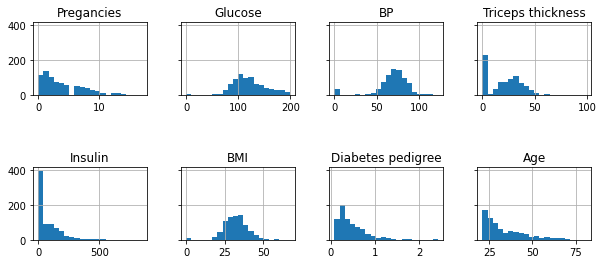

In [4]:
X_df.hist(bins=20, layout=(2,4), figsize=(10,4),sharey=True)
plt.subplots_adjust(hspace=1)

#### And then see how it differs for the two output classes

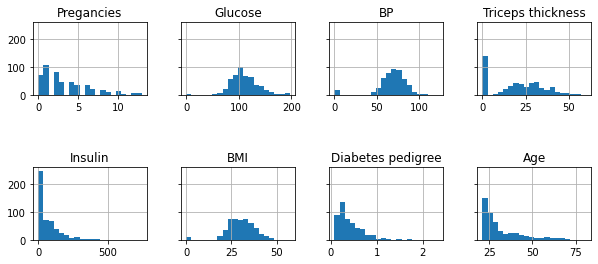

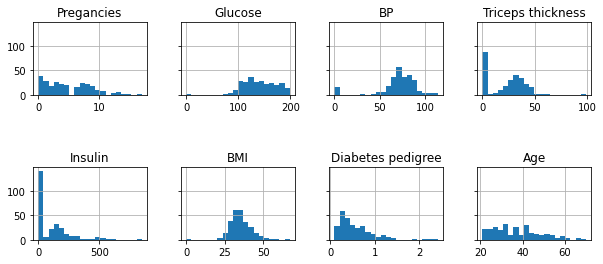

In [5]:
X_df.loc[y==0].hist(bins=20, layout=(2,4), figsize=(10,4),sharey=True)
plt.subplots_adjust(hspace=1)

X_df.loc[y==1].hist(bins=20, layout=(2,4), figsize=(10,4),sharey=True)
plt.subplots_adjust(hspace=1)


## Define the model

In [6]:
# define the keras model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### List the model layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


### Compile and fit the model

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
77/77 [==============================] - 1s 2ms/step - loss: 5.2483 - accuracy: 0.4648
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 1.7729 - accuracy: 0.5352
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 1.3910 - accuracy: 0.5599
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 1.1238 - accuracy: 0.5729
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.9821 - accuracy: 0.5924
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.6120
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.7866 - accuracy: 0.6198
Epoch 8/100
77/77 [==============================] - 0s 2ms/step - loss: 0.7710 - accuracy: 0.6302
Epoch 9/100
77/77 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.6354
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.7449 - accuracy: 0.6589
Epoch 11/

### and get the accuracy report

In [9]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5435 - accuracy: 0.7227
Accuracy: 72.27


## Let's look at the prediction outputs

##### Raw prediction gives values between 0 and 1 derived from the sigmoid activation of the last layer of the model

In [10]:
model.predict(X[:10])

1/1 [==============================] - 0s 66ms/step


array([[0.57038885],
       [0.13660829],
       [0.8397505 ],
       [0.06961524],
       [0.26280665],
       [0.29610848],
       [0.17016898],
       [0.5846891 ],
       [0.37928063],
       [0.0525165 ]], dtype=float32)

##### A result of greater than 0.5 represents a greater than 50% prediction that this case will be positive for diabetes

In [11]:
model.predict(X[:10]) > 0.5

1/1 [==============================] - 0s 15ms/step


array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False]])

##### That can be turned into a 0/1 value to match our y variable using a specific type conversion, and reoriented to same dimensionality as the y variable

In [12]:
(model.predict(X[:10]) > 0.5).astype(int)

1/1 [==============================] - 0s 15ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [13]:
(model.predict(X[:10]) > 0.5).astype(int).reshape(1,-1)

1/1 [==============================] - 0s 15ms/step


array([[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]])

#### And finally we can produce the vector of predictions for the full dataset

In [14]:
predictions = (model.predict(X) > 0.5).astype(int).reshape(1,-1)[0]

24/24 [==============================] - 0s 1ms/step


#### Check the accuracy of the result that was reported above

In [15]:
(predictions == y).astype(int).sum() / len(y)

0.72265625

# Exercise

### Modify the code to use separate train and test subsets